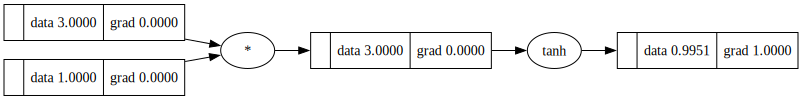

In [128]:
# Based on Andrej Karpathy's micrograd library
from graphviz import Digraph
import math


def trace(root):
    nodes, edges = set(), set()

    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)

    build(root)
    return nodes, edges


def draw_dot(root, format="svg", rankdir="LR"):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ["LR", "TB"]
    nodes, edges = trace(root)
    dot = Digraph(
        format=format, graph_attr={"rankdir": rankdir}
    )  # , node_attr={'rankdir': 'TB'})

    for n in nodes:
        dot.node(
            name=str(id(n)),
            label="{ %s | data %.4f | grad %.4f }" % (n._label, n.data, n.grad),
            shape="record",
        )
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot


class Node:
    def __init__(self, data, _children=(), _op=(), _label=""):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self._label = _label

    def __add__(self, other):
        out = Node(self.data + other.data, (self, other), "+")

        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad

        out._backward = _backward

        return out

    def __mul__(self, other):
        out = Node(self.data * other.data, (self, other), "*")

        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad

        out._backward = _backward

        return out

    def tanh(self):
        t = (math.exp(2 * self.data) - 1) / (math.exp(2 * self.data) + 1)
        out = Node(t, _children=(self,), _op="tanh")

        def _backward():
            self.grad = (1 - t**2) * out.grad

        out._backword = _backward

        return out

    def __repr__(self):
        return f"Node(data={self.data})"


x = Node(1.0)
a = Node(3.0)
y = (x * a).tanh()
y.grad = 1.0
y._backward()
draw_dot(y)

In [87]:
d._prev

{Node(data=-6), Node(data=5)}

In [105]:
d._op

'+'

In [110]:
w.grad = 0.5
w._backward()

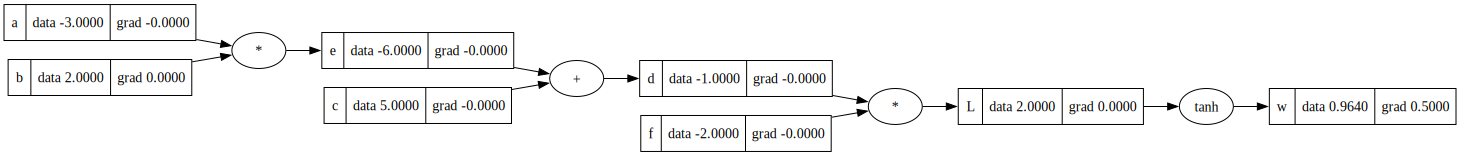

In [111]:
draw_dot(w)